# 6. Forecasting Modelle

## 6.1 Vorbereitungen

Bevor wir Forecasting Modelle anwenden können müssen wir noch den Datensatz tageweise zusammenfassen

In [102]:
# Löschen der Zeilen mit Werten über 20 in der Spalte 'butterzopf_mittel'
#data_prep = data_prep.loc[data_prep['butterzopf_mittel'] > 20, 'butterzopf_mittel'] = None

In [103]:
# Importieren wichtiger Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [104]:
pd.options.display.max_columns = None

In [105]:
data = pd.read_csv('data_zahltag.csv')

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719678 entries, 0 to 719677
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Artikel                      719678 non-null  object 
 1   Menge                        719678 non-null  float64
 2   Umsatz                       719678 non-null  float64
 3   Bestellungen                 719678 non-null  float64
 4   Niederschlag                 717181 non-null  float64
 5   Temperatur Schnitt Tag       711720 non-null  float64
 6   Niederschlag Summe Tag       719678 non-null  float64
 7   Globalstrahlung Schnitt Tag  711720 non-null  float64
 8   Uhrzeit                      719678 non-null  object 
 9   Stunde                       719678 non-null  int64  
 10  Datum                        719678 non-null  object 
 11  Wochentag                    719678 non-null  object 
 12  Monat                        719678 non-null  int64  
 13 

In [107]:
# Verschiedene Werte in Spalte 'Ferienzeit TG'
data['Ferienzeit TG'].unique()

array(['Weihnachtsferien', nan, 'Sportferien', 'Frühlingsferien',
       'Pfingstferien', 'Sommerferien', 'Herbstferien'], dtype=object)

In [108]:
data['Ferienzeit SG'].unique()

array(['Weihnachtsferien', 'Keine Ferienzeit', 'Sportferien',
       'Frühlingsferien', 'Sommerferien', 'Herbstferien'], dtype=object)

In [109]:
# Transformieren der Werte in der Spalte Ferienzeit TG in Categorical
data['Ferienzeit TG'] = data['Ferienzeit TG'].astype('category')

In [110]:
# Add 'Keine Ferienzeit' as a new category to 'Ferienzeit TG' column
data['Ferienzeit TG'] = data['Ferienzeit TG'].cat.add_categories(['Keine Ferienzeit'])

# Fill missing values with the new category
data['Ferienzeit TG'] = data['Ferienzeit TG'].fillna('Keine Ferienzeit')

In [111]:
# Droppen von Spalten, die nicht zur Regression beitragen
data_prep = data.drop(['Stückpreis', 'Umsatz', 'Niederschlag', 'Uhrzeit', 'Stunde', 'Feiertag Name'], axis = 1)
data_prep = pd.get_dummies(data_prep, columns = ['Ferienzeit TG', 'Geschmack', 'Vortag von', 'Ferienzeit SG'])
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719678 entries, 0 to 719677
Data columns (total 55 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   Artikel                                          719678 non-null  object 
 1   Menge                                            719678 non-null  float64
 2   Bestellungen                                     719678 non-null  float64
 3   Temperatur Schnitt Tag                           711720 non-null  float64
 4   Niederschlag Summe Tag                           719678 non-null  float64
 5   Globalstrahlung Schnitt Tag                      711720 non-null  float64
 6   Datum                                            719678 non-null  object 
 7   Wochentag                                        719678 non-null  object 
 8   Monat                                            719678 non-null  int64  
 9   Fastenzeit     

In [112]:
# Entfernen von Missing Values außer in Dummies
data_prep = data_prep.dropna()
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711720 entries, 520 to 719677
Data columns (total 55 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   Artikel                                          711720 non-null  object 
 1   Menge                                            711720 non-null  float64
 2   Bestellungen                                     711720 non-null  float64
 3   Temperatur Schnitt Tag                           711720 non-null  float64
 4   Niederschlag Summe Tag                           711720 non-null  float64
 5   Globalstrahlung Schnitt Tag                      711720 non-null  float64
 6   Datum                                            711720 non-null  object 
 7   Wochentag                                        711720 non-null  object 
 8   Monat                                            711720 non-null  int64  
 9   Fastenzeit   

In [113]:
data_prep.head()

,Artikel,Menge,Bestellungen,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Datum,Wochentag,Monat,Fastenzeit,Ramadan,Zahltag,Zahltagszeit,Ferienzeit TG_Frühlingsferien,Ferienzeit TG_Herbstferien,Ferienzeit TG_Pfingstferien,Ferienzeit TG_Sommerferien,Ferienzeit TG_Sportferien,Ferienzeit TG_Weihnachtsferien,Ferienzeit TG_Keine Ferienzeit,Geschmack_herzhaft,Geschmack_süss,Vortag von_Vortag Allerheiligen,Vortag von_Vortag Allerseelen,Vortag von_Vortag Auffahrt,Vortag von_Vortag Dreikönigstag,Vortag von_Vortag Dritter Advent,"Vortag von_Vortag Eidg. Dank-, Buss- und Bettag",Vortag von_Vortag Erster Advent,Vortag von_Vortag Fronleichnam,Vortag von_Vortag Halloween,Vortag von_Vortag Heiliger Abend,Vortag von_Vortag Karfreitag,Vortag von_Vortag Muttertag,Vortag von_Vortag Nationalfeiertag Schweiz,Vortag von_Vortag Neujahrstag,Vortag von_Vortag Ostern,Vortag von_Vortag Palmsonntag,Vortag von_Vortag Pfingsten,Vortag von_Vortag Schweizer Vätertag,Vortag von_Vortag Silvester,Vortag von_Vortag St. Nikolaus,Vortag von_Vortag Stephanstag,Vortag von_Vortag Tag der Arbeit,Vortag von_Vortag Valentinstag,Vortag von_Vortag Vierter Advent,Vortag von_Vortag Weihnachten,Vortag von_Vortag Zweiter Advent,Vortag von_normaler Tag,Ferienzeit SG_Frühlingsferien,Ferienzeit SG_Herbstferien,Ferienzeit SG_Keine Ferienzeit,Ferienzeit SG_Sommerferien,Ferienzeit SG_Sportferien,Ferienzeit SG_Weihnachtsferien
520,Butterzopf mittel,1.0,0.0,5.245833,1.8,39.166667,2016-02-05,Friday,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
521,Butterzopf mittel,1.0,0.0,5.245833,1.8,39.166667,2016-02-05,Friday,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
522,Butterzopf mittel,1.0,0.0,5.245833,1.8,39.166667,2016-02-05,Friday,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
523,Butterzopf mittel,1.0,0.0,5.245833,1.8,39.166667,2016-02-05,Friday,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
524,Butterzopf mittel,1.0,0.0,5.245833,1.8,39.166667,2016-02-05,Friday,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [114]:
# One-Hot-Encoding für die Spalte "Artikel"
#data_prep = pd. get_dummies (data_prep, columns = [ 'Artikel' ])

# Gruppieren der Daten nach Datum und berechnen der Summe der Menge pro Artikel
sum_cols = ['Menge', 'Bestellungen']

mean_cols = ['Temperatur Schnitt Tag','Niederschlag Summe Tag', 
             'Globalstrahlung Schnitt Tag', 'Fastenzeit','Ramadan']

for col in data_prep.columns:
    if col.startswith(('Ferienzeit', 'Geschmack', 'Feiertag', 'Vortag von', 'Ferienzeit SG')):
        mean_cols.append(col)

agg_dict = {col: 'sum' for col in sum_cols}
agg_dict.update({col: 'mean' for col in mean_cols})

data_prep = data_prep.groupby(['Datum', 'Artikel']).agg(agg_dict).reset_index()

# Ersetzen der Leerzeichen in Artikel mit Unterstrich
data_prep['Artikel'] = data_prep['Artikel'].str.replace(' ', '_')
data_prep = data_prep.drop('Datum', axis = 1)
data_prep.head()


,Artikel,Menge,Bestellungen,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Fastenzeit,Ramadan,Ferienzeit TG_Frühlingsferien,Ferienzeit TG_Herbstferien,Ferienzeit TG_Pfingstferien,Ferienzeit TG_Sommerferien,Ferienzeit TG_Sportferien,Ferienzeit TG_Weihnachtsferien,Ferienzeit TG_Keine Ferienzeit,Geschmack_herzhaft,Geschmack_süss,Vortag von_Vortag Allerheiligen,Vortag von_Vortag Allerseelen,Vortag von_Vortag Auffahrt,Vortag von_Vortag Dreikönigstag,Vortag von_Vortag Dritter Advent,"Vortag von_Vortag Eidg. Dank-, Buss- und Bettag",Vortag von_Vortag Erster Advent,Vortag von_Vortag Fronleichnam,Vortag von_Vortag Halloween,Vortag von_Vortag Heiliger Abend,Vortag von_Vortag Karfreitag,Vortag von_Vortag Muttertag,Vortag von_Vortag Nationalfeiertag Schweiz,Vortag von_Vortag Neujahrstag,Vortag von_Vortag Ostern,Vortag von_Vortag Palmsonntag,Vortag von_Vortag Pfingsten,Vortag von_Vortag Schweizer Vätertag,Vortag von_Vortag Silvester,Vortag von_Vortag St. Nikolaus,Vortag von_Vortag Stephanstag,Vortag von_Vortag Tag der Arbeit,Vortag von_Vortag Valentinstag,Vortag von_Vortag Vierter Advent,Vortag von_Vortag Weihnachten,Vortag von_Vortag Zweiter Advent,Vortag von_normaler Tag,Ferienzeit SG_Frühlingsferien,Ferienzeit SG_Herbstferien,Ferienzeit SG_Keine Ferienzeit,Ferienzeit SG_Sommerferien,Ferienzeit SG_Sportferien,Ferienzeit SG_Weihnachtsferien
0,BT_Nussgipfel,14.0,0.0,3.890909,1.6,12.636364,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Buttergipfeli,131.0,0.0,3.890909,1.6,12.636364,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Crèmeschnitten,28.0,0.0,3.890909,1.6,12.636364,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Hefe-Vanille-Weggli,13.0,0.0,3.890909,1.6,12.636364,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Il_pollo_forte_gefüllt,20.0,0.0,3.890909,1.6,12.636364,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [115]:
# Splitten des Datensets in Datasets für die einzelnen Artikel mit einer for-schleife

dataframes = [data_prep[data_prep['Artikel'] == i] for i in data_prep['Artikel'].unique()]

In [116]:
data_prep.reset_index(drop=True, inplace=True)
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27856 entries, 0 to 27855
Data columns (total 50 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Artikel                                          27856 non-null  object 
 1   Menge                                            27856 non-null  float64
 2   Bestellungen                                     27856 non-null  float64
 3   Temperatur Schnitt Tag                           27856 non-null  float64
 4   Niederschlag Summe Tag                           27856 non-null  float64
 5   Globalstrahlung Schnitt Tag                      27856 non-null  float64
 6   Fastenzeit                                       27856 non-null  float64
 7   Ramadan                                          27856 non-null  float64
 8   Ferienzeit TG_Frühlingsferien                    27856 non-null  float64
 9   Ferienzeit TG_Herbstferien  

In [117]:
data_prep.head()

,Artikel,Menge,Bestellungen,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Fastenzeit,Ramadan,Ferienzeit TG_Frühlingsferien,Ferienzeit TG_Herbstferien,Ferienzeit TG_Pfingstferien,Ferienzeit TG_Sommerferien,Ferienzeit TG_Sportferien,Ferienzeit TG_Weihnachtsferien,Ferienzeit TG_Keine Ferienzeit,Geschmack_herzhaft,Geschmack_süss,Vortag von_Vortag Allerheiligen,Vortag von_Vortag Allerseelen,Vortag von_Vortag Auffahrt,Vortag von_Vortag Dreikönigstag,Vortag von_Vortag Dritter Advent,"Vortag von_Vortag Eidg. Dank-, Buss- und Bettag",Vortag von_Vortag Erster Advent,Vortag von_Vortag Fronleichnam,Vortag von_Vortag Halloween,Vortag von_Vortag Heiliger Abend,Vortag von_Vortag Karfreitag,Vortag von_Vortag Muttertag,Vortag von_Vortag Nationalfeiertag Schweiz,Vortag von_Vortag Neujahrstag,Vortag von_Vortag Ostern,Vortag von_Vortag Palmsonntag,Vortag von_Vortag Pfingsten,Vortag von_Vortag Schweizer Vätertag,Vortag von_Vortag Silvester,Vortag von_Vortag St. Nikolaus,Vortag von_Vortag Stephanstag,Vortag von_Vortag Tag der Arbeit,Vortag von_Vortag Valentinstag,Vortag von_Vortag Vierter Advent,Vortag von_Vortag Weihnachten,Vortag von_Vortag Zweiter Advent,Vortag von_normaler Tag,Ferienzeit SG_Frühlingsferien,Ferienzeit SG_Herbstferien,Ferienzeit SG_Keine Ferienzeit,Ferienzeit SG_Sommerferien,Ferienzeit SG_Sportferien,Ferienzeit SG_Weihnachtsferien
0,BT_Nussgipfel,14.0,0.0,3.890909,1.6,12.636364,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Buttergipfeli,131.0,0.0,3.890909,1.6,12.636364,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Crèmeschnitten,28.0,0.0,3.890909,1.6,12.636364,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Hefe-Vanille-Weggli,13.0,0.0,3.890909,1.6,12.636364,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Il_pollo_forte_gefüllt,20.0,0.0,3.890909,1.6,12.636364,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [118]:
pre_optimized = data_prep.copy()

### Optimierung

In [119]:
# Für Butterzopf_mittel: Berechnung der minimalen und maximalen Menge, sowie der Gesamtsumme der Menge
butterzopf_mittel = pre_optimized[data_prep['Artikel'] == 'Butterzopf_mittel']
print(butterzopf_mittel['Menge'].describe())
print('Summe: ', butterzopf_mittel['Menge'].sum())
print('Median: ', butterzopf_mittel['Menge'].median())

count    1975.000000
mean       31.604051
std        32.702989
min         1.000000
25%         7.000000
50%        15.000000
75%        57.000000
max       312.000000
Name: Menge, dtype: float64
Summe:  62418.0
Median:  15.0


Beim Butterzopf ist auffällig, dass bei einer relativ geringen Menge (16% von Verkaufsmenge Buttergipfel) eine hohe Variation in den gekauften Mengen besteht. Das erkennt man besonders daran, dass der Durchschnitt bei 31.6 liegt, während der Median nur bei 15 liegt.

Um dem entgegenzuwirken entfernen wir Werte größer 20, da wir davon ausgehen, dass solch große Mengen nicht ohne Voranküdigung gekauft werden. Und wenn der Kauf vorbestellt ist, dann ist er auch nicht mehr für unsere Prediciton relevant.

In [120]:
# For schleife, die durch alle Artikel iteriert und die Zeile löscht, wenn der Artikel 'butteropf Mittel' größer als 20 ist
#for i in range(len(data_prep)):
#    if data_prep['Artikel'][i] == 'Butterzopf_mittel' and data_prep['Menge'][i] > 20:
#        data_prep.drop(i, inplace = True)

#data_prep.info()

## 6.2 Lineare Regression

In [121]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [122]:
def LinReg_train_and_evaluate_product_model(data, product_id):
    # Filter the data for the specific product
    product_data = data[data['Artikel'] == product_id]
    
    # Split the data into features (X) and target (y)
    X = product_data.drop(['Menge', 'Artikel'], axis=1)
    y = product_data['Menge']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define the XGBoost model
    model = LinearRegression()
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Calculate the mean squared error of the model
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    R2 = model.score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return MAPE, R2, RMSE


In [123]:
LinReg_train_and_evaluate_product_model(data_prep, 'Buttergipfeli')

(0.230655155522812, 0.4887817044187889, 56.394623299022506)

In [124]:
linReg_Artikel = []  # Create an empty list to store the models

metric_names = ['MAPE', 'R2', 'RMSE']  # Add more metric names if there are more than 3 returned values

for product in data_prep['Artikel'].unique():
    model_metrics = LinReg_train_and_evaluate_product_model(data_prep, product)
    model_metrics_dict = {'Type': 'LinReg', 'product': product, **dict(zip(metric_names, model_metrics))}
    linReg_Artikel.append(model_metrics_dict)

# Visualize the results
linReg_Artikel = pd.DataFrame(linReg_Artikel)
linReg_Artikel

,Type,product,MAPE,R2,RMSE
0,LinReg,BT_Nussgipfel,0.262684,0.471934,10.302606
1,LinReg,Buttergipfeli,0.230655,0.488782,56.394623
2,LinReg,Crèmeschnitten,0.310088,0.721172,11.550752
3,LinReg,Hefe-Vanille-Weggli,0.256826,0.776828,4.373705
4,LinReg,Il_pollo_forte_gefüllt,0.160282,0.670352,3.089193
5,LinReg,Laugenbrötli,0.226187,0.573684,11.632324
6,LinReg,Laugengi.mit_SoBlu,0.204421,0.649181,19.778149
7,LinReg,Maisgipfel,0.240604,0.672004,18.873071
8,LinReg,Quarkzöpfli,0.192908,0.696365,4.762760
9,LinReg,Schoggibrötli,0.421669,0.830684,6.819518


In [125]:
# Extrahieren von MAPE aus dem Dataframe
LinReg_Artikel_MAPE = linReg_Artikel[['product', 'MAPE']]
LinReg_Artikel_MAPE

,product,MAPE
0,BT_Nussgipfel,0.262684
1,Buttergipfeli,0.230655
2,Crèmeschnitten,0.310088
3,Hefe-Vanille-Weggli,0.256826
4,Il_pollo_forte_gefüllt,0.160282
5,Laugenbrötli,0.226187
6,Laugengi.mit_SoBlu,0.204421
7,Maisgipfel,0.240604
8,Quarkzöpfli,0.192908
9,Schoggibrötli,0.421669


In [126]:
# Visualisieren der Ergebnisse
import matplotlib.pyplot as plt
import seaborn as sns


## 6.3 XGBoost Regressor

In [127]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import xgboost as xgb

In [128]:
buttergipfel = data_prep[data_prep['Artikel'] == 'Buttergipfeli']
buttergipfel.head()

# Splitten des Datensets in Trainings- und Testdaten
X = buttergipfel.drop(['Menge', 'Artikel'], axis=1)
y = buttergipfel['Menge']

X_buttergipfel_train, X_buttergipfel_test, y_buttergipfel_train, y_buttergipfel_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Erstellen des Modells
model_Buttergipfeli_xgb = xgb.XGBRegressor(objective ='reg:squarederror')

# Trainieren des Modells
model_Buttergipfeli_xgb.fit(X_buttergipfel_train, y_buttergipfel_train)

# Vorhersagen mit dem Modell
y_buttergipfel_pred = model_Buttergipfeli_xgb.predict(X_buttergipfel_test)

# Berechnen des MAPE
mape = mean_absolute_percentage_error(y_buttergipfel_test, y_buttergipfel_pred)
print('MAPE: %.3f' % mape)

MAPE: 0.207


In [129]:
def XGB_train_and_evaluate_product_model(data, product_id):
    # Filter the data for the specific product
    product_data = data[data['Artikel'] == product_id]
    
    # Split the data into features (X) and target (y)
    X = product_data.drop(['Menge', 'Artikel'], axis=1)
    y = product_data['Menge']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define the XGBoost model
    model = xgb.XGBRegressor(objective='reg:squarederror', n_jobs=-1)
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Calculate the mean squared error of the model
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    R2 = model.score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return MAPE, R2, RMSE


In [130]:
xgb_Artikel = []  # Create an empty list to store the models

metric_names = ['MAPE', 'R2', 'RMSE']  # Add more metric names if there are more than 3 returned values

for product in data_prep['Artikel'].unique():
    model_metrics = XGB_train_and_evaluate_product_model(data_prep, product)
    model_metrics_dict = {'Type': 'XGBoost', 'product': product, **dict(zip(metric_names, model_metrics))}
    xgb_Artikel.append(model_metrics_dict)

# Visualize the results
xgb_Artikel = pd.DataFrame(xgb_Artikel)
xgb_Artikel


,Type,product,MAPE,R2,RMSE
0,XGBoost,BT_Nussgipfel,0.291137,0.437808,10.630297
1,XGBoost,Buttergipfeli,0.207288,0.530077,54.068965
2,XGBoost,Crèmeschnitten,0.280242,0.699813,11.984990
3,XGBoost,Hefe-Vanille-Weggli,0.222373,0.818792,3.941115
4,XGBoost,Il_pollo_forte_gefüllt,0.134415,0.722879,2.832399
5,XGBoost,Laugenbrötli,0.211938,0.633425,10.786535
6,XGBoost,Laugengi.mit_SoBlu,0.212268,0.659855,19.474945
7,XGBoost,Maisgipfel,0.217107,0.724294,17.303417
8,XGBoost,Quarkzöpfli,0.182944,0.745146,4.363434
9,XGBoost,Schoggibrötli,0.401769,0.858222,6.240344


In [131]:
# Extrahieren von MAPE aus dem Dataframe
xgb_Artikel_MAPE = xgb_Artikel[['product', 'MAPE']]
xgb_Artikel_MAPE

,product,MAPE
0,BT_Nussgipfel,0.291137
1,Buttergipfeli,0.207288
2,Crèmeschnitten,0.280242
3,Hefe-Vanille-Weggli,0.222373
4,Il_pollo_forte_gefüllt,0.134415
5,Laugenbrötli,0.211938
6,Laugengi.mit_SoBlu,0.212268
7,Maisgipfel,0.217107
8,Quarkzöpfli,0.182944
9,Schoggibrötli,0.401769


## 6.5 Random Forest

In [132]:
# import random forest regressor
from sklearn.ensemble import RandomForestRegressor

In [133]:
def RF_train_and_evaluate_product_model(data, product_id):
    # Filter the data for the specific product
    product_data = data[data['Artikel'] == product_id]
    
    # Split the data into features (X) and target (y)
    X = product_data.drop(['Menge', 'Artikel'], axis=1)
    y = product_data['Menge']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define the XGBoost model
    model = RandomForestRegressor(n_jobs=-1)
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Calculate the mean squared error of the model
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    R2 = model.score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return MAPE, R2, RMSE


In [134]:
xgb_Artikel = []  # Create an empty list to store the models

metric_names = ['MAPE', 'R2', 'RMSE']  # Add more metric names if there are more than 3 returned values

for product in data_prep['Artikel'].unique():
    model_metrics = XGB_train_and_evaluate_product_model(data_prep, product)
    model_metrics_dict = {'Type': 'XGBoost', 'product': product, **dict(zip(metric_names, model_metrics))}
    xgb_Artikel.append(model_metrics_dict)

# Visualize the results
xgb_Artikel = pd.DataFrame(xgb_Artikel)
xgb_Artikel


,Type,product,MAPE,R2,RMSE
0,XGBoost,BT_Nussgipfel,0.291137,0.437808,10.630297
1,XGBoost,Buttergipfeli,0.207288,0.530077,54.068965
2,XGBoost,Crèmeschnitten,0.280242,0.699813,11.984990
3,XGBoost,Hefe-Vanille-Weggli,0.222373,0.818792,3.941115
4,XGBoost,Il_pollo_forte_gefüllt,0.134415,0.722879,2.832399
5,XGBoost,Laugenbrötli,0.211938,0.633425,10.786535
6,XGBoost,Laugengi.mit_SoBlu,0.212268,0.659855,19.474945
7,XGBoost,Maisgipfel,0.217107,0.724294,17.303417
8,XGBoost,Quarkzöpfli,0.182944,0.745146,4.363434
9,XGBoost,Schoggibrötli,0.401769,0.858222,6.240344


In [135]:
RF_Artikel = []  # Create an empty list to store the models

metric_names = ['MAPE', 'R2', 'RMSE']  # Add more metric names if there are more than 3 returned values

for product in data_prep['Artikel'].unique():
    model_metrics = RF_train_and_evaluate_product_model(data_prep, product)
    model_metrics_dict = {'Type': 'Random Forest', 'product': product, **dict(zip(metric_names, model_metrics))}
    RF_Artikel.append(model_metrics_dict)

# Visualize the results
RF_Artikel = pd.DataFrame(RF_Artikel)
RF_Artikel


,Type,product,MAPE,R2,RMSE
0,Random Forest,BT_Nussgipfel,0.275878,0.505417,9.970628
1,Random Forest,Buttergipfeli,0.200503,0.550393,52.887259
2,Random Forest,Crèmeschnitten,0.262711,0.758840,10.742237
3,Random Forest,Hefe-Vanille-Weggli,0.213704,0.824825,3.874954
4,Random Forest,Il_pollo_forte_gefüllt,0.117996,0.786919,2.483661
5,Random Forest,Laugenbrötli,0.203737,0.646533,10.591926
6,Random Forest,Laugengi.mit_SoBlu,0.204504,0.684107,18.767835
7,Random Forest,Maisgipfel,0.223030,0.717242,17.523289
8,Random Forest,Quarkzöpfli,0.182341,0.759821,4.235941
9,Random Forest,Schoggibrötli,0.373506,0.867582,6.030854


In [136]:
RF_Artikel_MAPE = RF_Artikel[['product', 'MAPE']]
RF_Artikel_MAPE

,product,MAPE
0,BT_Nussgipfel,0.275878
1,Buttergipfeli,0.200503
2,Crèmeschnitten,0.262711
3,Hefe-Vanille-Weggli,0.213704
4,Il_pollo_forte_gefüllt,0.117996
5,Laugenbrötli,0.203737
6,Laugengi.mit_SoBlu,0.204504
7,Maisgipfel,0.223030
8,Quarkzöpfli,0.182341
9,Schoggibrötli,0.373506


## 6.6 LASSO Regression

In [137]:
# Lasso Regression importieren
from sklearn.linear_model import Lasso

In [138]:
def LASSO_train_and_evaluate_product_model(data, product_id):
    # Filter the data for the specific product
    product_data = data[data['Artikel'] == product_id]
    
    # Split the data into features (X) and target (y)
    X = product_data.drop(['Menge', 'Artikel'], axis=1)
    y = product_data['Menge']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define the XGBoost model
    model = RandomForestRegressor(n_jobs=-1)
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Calculate the mean squared error of the model
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    R2 = model.score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return MAPE, R2, RMSE


In [139]:
LASSO_Artikel = []  # Create an empty list to store the models

metric_names = ['MAPE', 'R2', 'RMSE']  # Add more metric names if there are more than 3 returned values

for product in data_prep['Artikel'].unique():
    model_metrics = LASSO_train_and_evaluate_product_model(data_prep, product)
    model_metrics_dict = {'Type': 'LASSO', 'product': product, **dict(zip(metric_names, model_metrics))}
    LASSO_Artikel.append(model_metrics_dict)

# Visualize the results
LASSO_Artikel = pd.DataFrame(LASSO_Artikel)
LASSO_Artikel


,Type,product,MAPE,R2,RMSE
0,LASSO,BT_Nussgipfel,0.277721,0.510025,9.924073
1,LASSO,Buttergipfeli,0.199844,0.555885,52.563279
2,LASSO,Crèmeschnitten,0.267740,0.750680,10.922460
3,LASSO,Hefe-Vanille-Weggli,0.212264,0.828668,3.832206
4,LASSO,Il_pollo_forte_gefüllt,0.116806,0.796385,2.427866
5,LASSO,Laugenbrötli,0.204071,0.643726,10.633897
6,LASSO,Laugengi.mit_SoBlu,0.203114,0.683107,18.797518
7,LASSO,Maisgipfel,0.220278,0.720968,17.407475
8,LASSO,Quarkzöpfli,0.179242,0.766170,4.179582
9,LASSO,Schoggibrötli,0.375681,0.870570,5.962414


In [140]:
LASSO_Artikel_MAPE = LASSO_Artikel[['product', 'MAPE']]
LASSO_Artikel_MAPE

,product,MAPE
0,BT_Nussgipfel,0.277721
1,Buttergipfeli,0.199844
2,Crèmeschnitten,0.267740
3,Hefe-Vanille-Weggli,0.212264
4,Il_pollo_forte_gefüllt,0.116806
5,Laugenbrötli,0.204071
6,Laugengi.mit_SoBlu,0.203114
7,Maisgipfel,0.220278
8,Quarkzöpfli,0.179242
9,Schoggibrötli,0.375681


## 6.7 Neural Net

In [141]:
#import tensorflow as tf
from sklearn.preprocessing import StandardScaler
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.optimizers import Adam
#from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score


In [142]:
def neural_net_train_and_evaluate_product_model(data, product_id):
    # Filter the data for the specific product
    product_data = data[data['Artikel'] == product_id]

    # Split the data into features (X) and target (y)
    X = product_data.drop(['Menge', 'Artikel'], axis=1)
    y = product_data['Menge']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale your input features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create a simple neural network model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))

    # Compile the model
    optimizer = Adam(lr=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Train the model
    model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=100, batch_size=32, verbose=0)

    # Make predictions and evaluate the model
    y_pred = model.predict(X_test_scaled)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

    return MAPE, R2, RMSE

## 6.5 Vergleich der Modelle

In [143]:
# Verbinden der beiden Dataframes
Artikel_MAPE_temp1 = pd.merge(LinReg_Artikel_MAPE, xgb_Artikel_MAPE, on='product')
Artikel_MAPE_temp2 = pd.merge(Artikel_MAPE_temp1, RF_Artikel_MAPE, on='product')
Artikel_MAPE = pd.merge(Artikel_MAPE_temp2, LASSO_Artikel_MAPE, on='product')


# Umbenennen der Spalten
Artikel_MAPE.columns = ['Artikel', 'Lineare Regression', 'XGB', 'Random Forest', 'Lasso']
Artikel_MAPE

/var/folders/xt/0h_f_zjs1hvcdg6rdl1hs5_c0000gn/T/ipykernel_56370/201210493.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'MAPE_x'} in the result is deprecated and will raise a MergeError in a future version.
  Artikel_MAPE = pd.merge(Artikel_MAPE_temp2, LASSO_Artikel_MAPE, on='product')


,Artikel,Lineare Regression,XGB,Random Forest,Lasso
0,BT_Nussgipfel,0.262684,0.291137,0.275878,0.277721
1,Buttergipfeli,0.230655,0.207288,0.200503,0.199844
2,Crèmeschnitten,0.310088,0.280242,0.262711,0.267740
3,Hefe-Vanille-Weggli,0.256826,0.222373,0.213704,0.212264
4,Il_pollo_forte_gefüllt,0.160282,0.134415,0.117996,0.116806
5,Laugenbrötli,0.226187,0.211938,0.203737,0.204071
6,Laugengi.mit_SoBlu,0.204421,0.212268,0.204504,0.203114
7,Maisgipfel,0.240604,0.217107,0.223030,0.220278
8,Quarkzöpfli,0.192908,0.182944,0.182341,0.179242
9,Schoggibrötli,0.421669,0.401769,0.373506,0.375681


In [144]:
# Hinzufügen einer Spalte, die Spalte mit dem kleinsten MAPE-Wert enthält
Artikel_MAPE['Bestes Modell'] = Artikel_MAPE[['Lineare Regression', 'XGB', 'Random Forest', 'Lasso']].idxmin(axis=1)
Artikel_MAPE

,Artikel,Lineare Regression,XGB,Random Forest,Lasso,Bestes Modell
0,BT_Nussgipfel,0.262684,0.291137,0.275878,0.277721,Lineare Regression
1,Buttergipfeli,0.230655,0.207288,0.200503,0.199844,Lasso
2,Crèmeschnitten,0.310088,0.280242,0.262711,0.267740,Random Forest
3,Hefe-Vanille-Weggli,0.256826,0.222373,0.213704,0.212264,Lasso
4,Il_pollo_forte_gefüllt,0.160282,0.134415,0.117996,0.116806,Lasso
5,Laugenbrötli,0.226187,0.211938,0.203737,0.204071,Random Forest
6,Laugengi.mit_SoBlu,0.204421,0.212268,0.204504,0.203114,Lasso
7,Maisgipfel,0.240604,0.217107,0.223030,0.220278,XGB
8,Quarkzöpfli,0.192908,0.182944,0.182341,0.179242,Lasso
9,Schoggibrötli,0.421669,0.401769,0.373506,0.375681,Random Forest


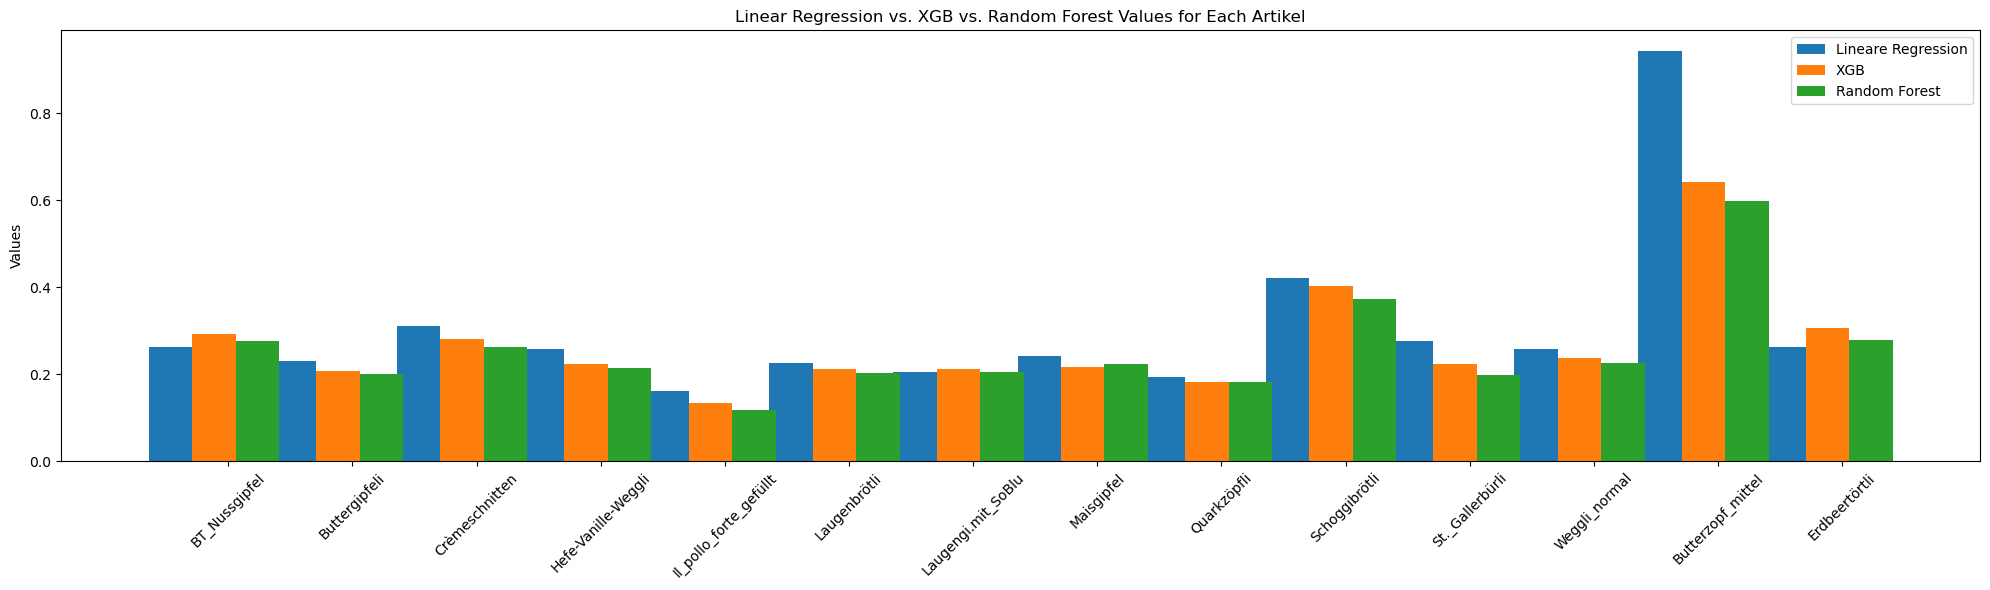

In [145]:
bar_width = 0.35

# Positions of the bars on the x-axis
ind = np.arange(len(Artikel_MAPE['Artikel']))

# Figure size
plt.figure(figsize=(20, 6))

# Create bars
plt.bar(ind - bar_width, Artikel_MAPE['Lineare Regression'], width=bar_width, label='Lineare Regression')
plt.bar(ind, Artikel_MAPE['XGB'], width=bar_width, label='XGB')
plt.bar(ind + bar_width, Artikel_MAPE['Random Forest'], width=bar_width, label='Random Forest')

# Set x-axis labels and ticks
plt.xticks(ind + bar_width / 3, Artikel_MAPE['Artikel'], rotation=45)

# Set y-axis label
plt.ylabel('Values')

# Set plot title
plt.title('Linear Regression vs. XGB vs. Random Forest Values for Each Artikel')

# Add legend
plt.legend(loc='best')

# Show plot
plt.tight_layout()
plt.show()

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

def custom_palette(values):
    palette = []
    for value in values:
        if value >= 0:
            palette.append('red')
        else:
            palette.append('green')
    return palette

plt.figure(figsize=(10, 5))

# Extract MAPE Diff XGB values for the custom_palette function
mape_diff_values = Artikel_MAPE['MAPE Diff XGB'].values

# Use the custom palette with the sns.barplot function
sns.barplot(x='Artikel', y='MAPE Diff XGB', data=Artikel_MAPE, palette=custom_palette(mape_diff_values))

plt.xticks(rotation=90)
plt.show()


KeyError: 'MAPE Diff XGB'

<Figure size 1000x500 with 0 Axes>

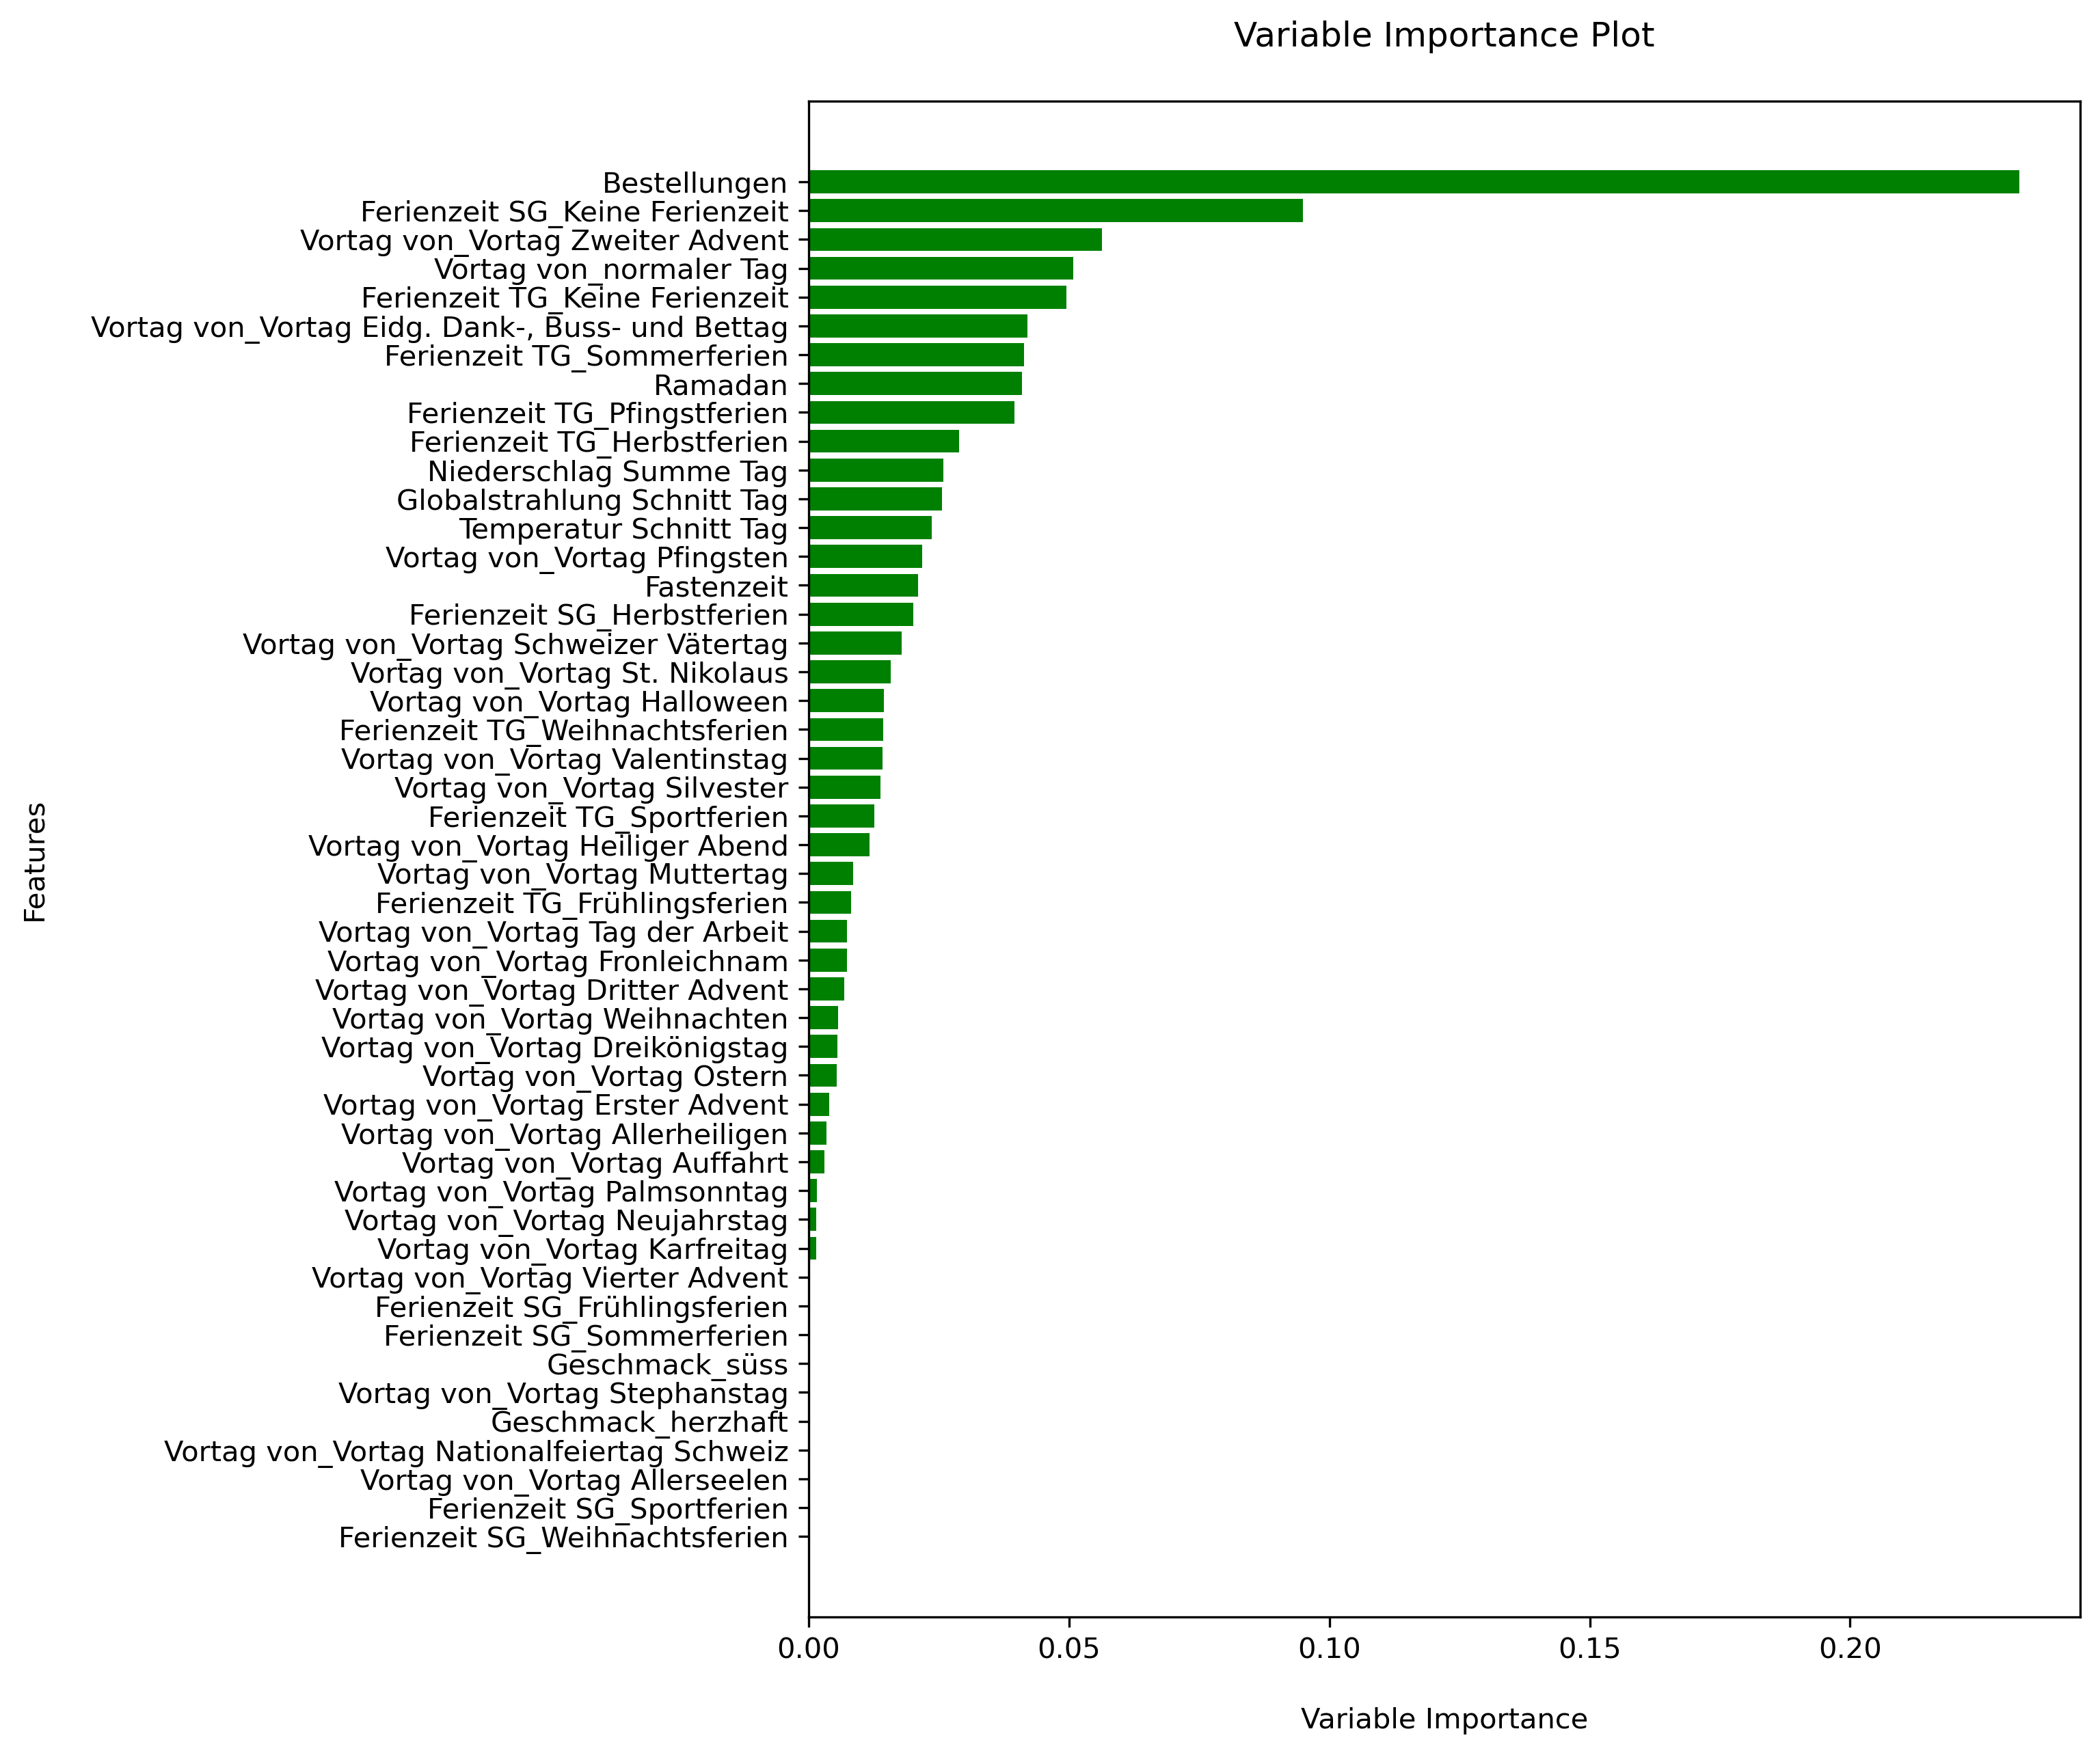

In [147]:
def plot_variable_importance(model_Buttergipfeli_xgb, X_buttergipfel_train):
    import matplotlib.pyplot as plt
    from pandas import DataFrame
    imp=DataFrame({"imp":model_Buttergipfeli_xgb.feature_importances_, "names":X_buttergipfel_train.columns}).sort_values("imp", ascending=True)
    fig, ax = plt.subplots(figsize=(imp.shape[0]/6,imp.shape[0]/5), dpi=300) 
    ax.barh(imp["names"],imp["imp"], color="green") 
    ax.set_xlabel('\nVariable Importance')
    ax.set_ylabel('Features\n') 
    ax.set_title('Variable Importance Plot\n') 
    plt.show() 
plot_variable_importance(model_Buttergipfeli_xgb, X_buttergipfel_train)

# Optimierung des Datensatzes

In [148]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor


In [149]:
# Custom scoring function to use MAPE in GridSearchCV
def mape_scorer(y_true, y_pred):
    return mean_absolute_percentage_error(y_true, y_pred)

# Function to perform grid search with cross-validation
def grid_search_cv(model, params, X_train, y_train, cv=5):
    grid = GridSearchCV(model, param_grid=params, scoring=make_scorer(mape_scorer, greater_is_better=False), cv=cv)
    grid.fit(X_train, y_train)
    return grid.best_params_, -grid.best_score_


In [154]:
# Model hyperparameters to optimize
model_hyperparameters = {
    'Lineare Regression': {},
    'XGBoost': {'learning_rate': [0.1, 0.2],
        'n_estimators': [100, 200],
        'max_depth': [3, 5],
        'subsample': [0.5, 1],
        'colsample_bytree': [0.5, 1],
        'gamma': [0, 1],},
    'Random Forest': {'n_estimators': [100, 200],
        'max_depth': [None, 10],
        'min_samples_split': [2, 10],
        'max_features': ['auto', 'sqrt'],},
    'Lasso': {'alpha': [0.01, 1],
        'fit_intercept': [True, False],
        'normalize': [True, False],
        'max_iter': [1000],
        'tol': [1e-4],},
}

In [155]:
# Dictionary mit Model Name und Model
models = {
    'Lineare Regression': LinearRegression(),
    'XGBoost': XGBRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Lasso': Lasso(),}

In [158]:
for index, row in Artikel_MAPE.iterrows():
    product = row['Artikel']
    best_model_name = row['Bestes Modell']
    best_model = models[best_model_name]  # Assuming you have a dictionary of models

    # Filter data for the specific product
    product_data = data_prep[data_prep['Artikel'] == product]
    product_target = data_prep[data_prep['Menge'] == product]

    # Split data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(product_data, product_target, test_size=0.2, random_state=42)

    # Perform grid search with cross-validation
    params = model_hyperparameters[best_model_name]
    best_params, best_score = grid_search_cv(best_model, params, X_train, y_train)

    # Update the DataFrame with the best hyperparameters and MAPE score
    Artikel_MAPE.loc[index, 'Best Hyperparameters'] = str(best_params)
    Artikel_MAPE.loc[index, 'Best MAPE'] = best_score

    # Retrain the best model with the best hyperparameters on the entire dataset
    best_model.set_params(**best_params)
    best_model.fit(product_data, product_target)

ValueError: Found input variables with inconsistent numbers of samples: [2146, 0]

## Test-Optimierung des XGBoost Modells mit Cross Validation und Grid Search für Buttergipfeli

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Initialisieren des Modells
xgb = xgb.XGBRegressor()

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 300],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
}

# Erschaffen einer GridSearchCV object
xgb_CV_Buttergipfel = GridSearchCV(xgb, param_grid, scoring='r2', cv=5, n_jobs=-1, verbose=1)
xgb_CV_Buttergipfel.fit(X_buttergipfel_train, y_buttergipfel_train)

# Bestes Modell speichern
best_xgb = xgb_CV_Buttergipfel.best_estimator_

# KPIs berechnen
best_model_R2 = best_xgb.score(X_buttergipfel_train, y_buttergipfel_train)
y_pred_xgb = best_xgb.predict(X_buttergipfel_test)
best_model_RMSE = mean_squared_error(y_buttergipfel_test, y_pred_xgb, squared=False)
best_model_MAPE = mean_absolute_percentage_error(y_buttergipfel_test, y_pred_xgb)

print("Best Model R2:", best_model_R2)
print("Best Model RMSE:", best_model_RMSE)
print("Best Model MAPE:", best_model_MAPE)

# print best parameter after tuning
print(xgb_CV_Buttergipfel.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Model R2: 0.6978871686062905
Best Model RMSE: 50.83435603248295
Best Model MAPE: 0.1971506680671557
{'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}


## Test zum Anpassen von Extremwerten in der Menge

Vor allem der 'Butterzopf_mittel' sticht in der Analyse heraus. Er hat einen unglaublich hohen MAPE mit 62% Abweichung aber auch ein hohes R2 (0.84). Deshalb nehmen wir diesen Artikel als Startpunkt auf der Suche nach besserem Verständnis unseres Modells und den Eigenheiten des Datensatzes

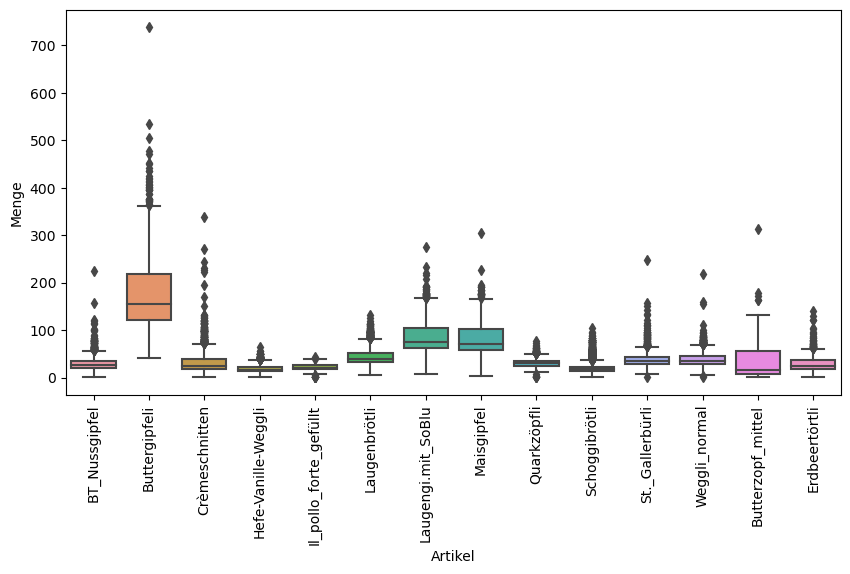

In [ ]:
# Boxplot aller Artikel
plt.figure(figsize=(10, 5))
sns.boxplot(x='Artikel', y='Menge', data=data_prep)
plt.xticks(rotation=90)
plt.show() 

In [ ]:
# Für Butterzopf_mittel: Berechnung der minimalen und maximalen Menge, sowie der Gesamtsumme der Menge
butterzopf_mittel = pre_optimized[data_prep['Artikel'] == 'Butterzopf_mittel']
print(butterzopf_mittel['Menge'].describe())
print('Summe: ', butterzopf_mittel['Menge'].sum())
print('Median: ', butterzopf_mittel['Menge'].median())


count    1975.000000
mean       31.604051
std        32.702989
min         1.000000
25%         7.000000
50%        15.000000
75%        57.000000
max       312.000000
Name: Menge, dtype: float64
Summe:  62418.0
Median:  15.0


Beim Butterzopf ist auffällig, dass bei einer relativ geringen Menge (16% von Verkaufsmenge Buttergipfel) eine hohe Variation in den gekauften Mengen besteht. Das erkennt man besonders daran, dass der Durchschnitt bei 31.6 liegt, während der Median nur bei 15 liegt.

Um dem entgegenzuwirken entfernen wir Werte größer 20, da wir davon ausgehen, dass solch große Mengen nicht ohne Voranküdigung gekauft werden. Und wenn der Kauf vorbestellt ist, dann ist er auch nicht mehr für unsere Prediciton relevant.

In [ ]:

butterzopf_mittel = butterzopf_mittel[butterzopf_mittel['Menge'] < 20]
butterzopf_test = XGB_train_and_evaluate_product_model(butterzopf_mittel, 'Butterzopf_mittel')
print(butterzopf_test)


AttributeError: 'XGBRegressor' object has no attribute 'XGBRegressor'

Mit sinkendem Maximalen Wert, ist die der MAPE ebenfalls. Deshalb wenden wir diese Cleaning Maßnahme nun auch im richtigen Modell an

In [ ]:
# Für Schoggibrötli: Berechnung der minimalen und maximalen Menge, sowie der Gesamtsumme der Menge
Schoggibrötli = data_prep[data_prep['Artikel'] == 'Schoggibrötli']
print(Schoggibrötli['Menge'].describe())
print('Summe: ', Schoggibrötli['Menge'].sum())
print('Median: ', Schoggibrötli['Menge'].median())

NameError: name 'data_prep' is not defined

In [ ]:
# Für Butterzopf_mittel: Berechnung der minimalen und maximalen Menge, sowie der Gesamtsumme der Menge
buttergipfeli = data_prep[data_prep['Artikel'] == 'Buttergipfeli']
print(buttergipfeli['Menge'].describe())
print('Summe: ', buttergipfeli['Menge'].sum())
print('Median: ', buttergipfeli['Menge'].median())

Im Vergleich mit dem Buttergipfel zeigt sich, dass 

# Ablage